In [3]:
import pandas as pd
import numpy as np
import calendar

In [139]:
#start_date = '1/1/2014'
start_date = '8/1/2017'
basic_files = [f'{calendar.month_abbr[m.month].lower()}{m.year % 100}pub.dat' 
               for m in pd.date_range(start=start_date, periods=12, freq='MS')]

In [140]:
basic_series = [('GTCBSA', 95, 100),
                ('PRTAGE', 121, 123),
                ('PEMLR', 179, 181), 
                ('PWCMPWGT', 845, 855)]

basic_path = 'E:/08_Other/Archive/data'

In [141]:
df = pd.DataFrame()
for basic_file in basic_files:
    df = df.append(pd.read_fwf(f'{basic_path}/{basic_file}', 
                      colspecs=[tuple([v[1], v[2]]) for v in basic_series],
                      names=[v[0] for v in basic_series]), ignore_index=True)
    
df = df.query('PEMLR != -1 and PWCMPWGT > 0 and GTCBSA > 0')

In [142]:
dis = lambda x: np.average(np.where(x['PEMLR'] == 6, 1, 0), weights=x['PWCMPWGT'])
dis2017 = df.query('PRTAGE > 24 and PRTAGE < 55').groupby('GTCBSA').apply(dis).sort_values()
#dislist = list((dis2014 * 100)[-80:].index)

In [143]:
dch = (dis2017 - dis2014).dropna()

In [144]:
dkgreen = [str(cbsa) for cbsa, value in list(zip(dch.keys(), dch.values)) if value <= -0.05]
mdgreen = [str(cbsa) for cbsa, value in list(zip(dch.keys(), dch.values)) if value <= -0.025 and value > -0.005]
ltgreen = [str(cbsa) for cbsa, value in list(zip(dch.keys(), dch.values)) if value <= -0.005 and value > -0.025]
neutral = [str(cbsa) for cbsa, value in list(zip(dch.keys(), dch.values)) if value < 0.005 and value >= -0.005]
ltpink = [str(cbsa) for cbsa, value in list(zip(dch.keys(), dch.values)) if value < 0.025 and value >= 0.005]
mdpink = [str(cbsa) for cbsa, value in list(zip(dch.keys(), dch.values)) if value < 0.05 and value >= 0.025]
dkpink = [str(cbsa) for cbsa, value in list(zip(dch.keys(), dch.values)) if value >= 0.05]

In [81]:
blist = [str(i) for i in (dis2016 - dis2014).dropna().sort_values()[0:20].index]

# Map

In [65]:
%matplotlib inline
from mpl_toolkits.basemap import Basemap
import matplotlib.pyplot as plt
from matplotlib.patches import Polygon
from matplotlib.collections import PatchCollection
from matplotlib.patches import PathPatch

In [38]:
# Show full US:
m = Basemap(llcrnrlon=-121, llcrnrlat=20, urcrnrlon=-64, urcrnrlat=49,
            projection='lcc', lat_1=33, lat_2=45, lon_0=-95)

<Figure size 432x288 with 0 Axes>

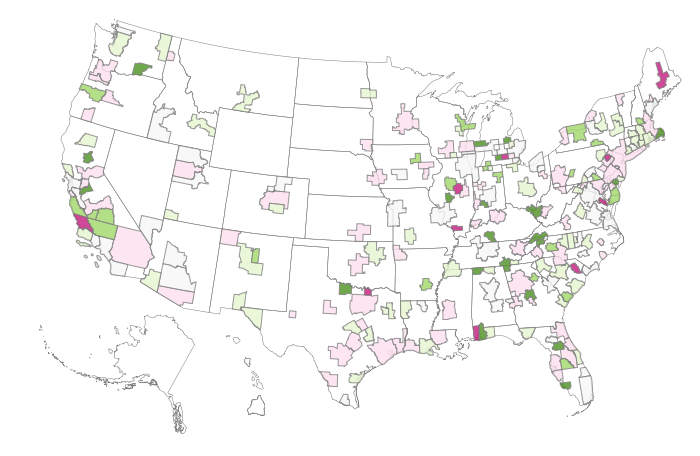

In [147]:
plt.gcf()
fig = plt.figure(figsize=(16,8))

# Read the shapefile contained in the same folder (and the two related files)
m.readshapefile('Shape/st99_d00', 'states', drawbounds=True, color='grey')
m.readshapefile('Shape/tl_2013_us_cbsa', 'cbsa', drawbounds=False, color='grey')
ax = plt.gca()

for shape in m.states_info:
    sh_num = int(shape['SHAPENUM'] - 1)
    if shape['NAME'] == 'Hawaii' and float(shape['AREA']) > 0.005:
        seg = [tuple([x + 5200000, y-1400000]) for x,y in m.states[sh_num]]
    elif shape['NAME'] == 'Alaska' and float(shape['AREA']) > 0.0005:
        seg = [tuple([0.35*x + 1100000, 0.35*y-1300000]) for x,y in m.states[sh_num]]
    poly = Polygon(seg, facecolor='white', edgecolor='gray', linewidth=.5)
    ax.add_patch(poly)

vlow, mlow, llow, neu, lhi, mhi, vhi = ([] for i in range(7))
for info, shape in zip(m.cbsa_info, m.cbsa):
    if info['GEOID'] in dkgreen:
        vlow.append(Polygon(np.array(shape), True))
    if info['GEOID'] in mdgreen:
        mlow.append(Polygon(np.array(shape), True))
    if info['GEOID'] in ltgreen:
        llow.append(Polygon(np.array(shape), True))
    if info['GEOID'] in neutral:
        neu.append(Polygon(np.array(shape), True))
    if info['GEOID'] in ltpink:
        lhi.append(Polygon(np.array(shape), True))
    if info['GEOID'] in mdpink:
        mhi.append(Polygon(np.array(shape), True))
    if info['GEOID'] in dkpink:
        vhi.append(Polygon(np.array(shape), True))

ax.add_collection(
    PatchCollection(vlow, facecolor='#4d9221', edgecolor='gray', 
                    alpha=0.8, zorder=2))
ax.add_collection(
    PatchCollection(mlow, facecolor='#a1d76a', edgecolor='gray', 
                    alpha=0.8, zorder=2))
ax.add_collection(
    PatchCollection(llow, facecolor='#fde0ef', edgecolor='gray', 
                    alpha=0.8, zorder=2))
ax.add_collection(
    PatchCollection(neu, facecolor='#f7f7f7', edgecolor='gray', 
                    alpha=0.8, zorder=2))
ax.add_collection(
    PatchCollection(lhi, facecolor='#e6f5d0', edgecolor='gray', 
                    alpha=0.8, zorder=2))
ax.add_collection(
    PatchCollection(mhi, facecolor='#a1d76a', edgecolor='gray', 
                    alpha=0.8, zorder=2))
ax.add_collection(
    PatchCollection(vhi, facecolor='#c51b7d', edgecolor='gray', 
                    alpha=0.8, zorder=2))
    
ax.axis('off')
plt.show()

In [42]:
for shape in m.states_info:
    sh_num = int(shape['SHAPENUM'] - 1)
    if shape['NAME'] == 'Hawaii' and float(shape['AREA']) > 0.005:
        seg = [tuple([x + 5200000, y-1400000]) for x,y in m.states[sh_num]]
    elif shapedict['NAME'] == 'Alaska':
        seg = [tuple([0.35*x + 1100000, 0.35*y-1300000]) for x,y in m.states[sh_num]]
    poly = Polygon(seg, facecolor='white', edgecolor='gray', linewidth=.5)
    ax.add_patch(poly)
        #    seg = list(map(lambda (x,y): (x + 5200000, y-1400000), seg))

In [161]:
list(set([v['GEOID'] for v in m.cbsa_info if v['NAME'][-2:] == 'HI']))

['25900', '27980', '28180', '46520']

In [158]:
m.cbsa_info[0]['NAME'][-2:]

'MN'

In [63]:
patches = []

for info, shape in zip(m.cbsa_info, m.cbsa):
    if info['GEOID'] == '40380':
        patches.append(Polygon(np.array(shape), True))
        
ax.add_collection(PatchCollection(patches, facecolor='blue', edgecolor='darkgray', alpha=0.8, linewidths=1., zorder=2))

AttributeError: 'Basemap' object has no attribute 'msa_info'

In [44]:
list(map(lambda (x,y): (x + 5200000, y-1400000), seg))

SyntaxError: invalid syntax (<ipython-input-44-a0610918aac9>, line 1)

In [48]:
[tuple([x + 5200000, y-1400000]) for x,y in m.states[sh_num]]

NameError: name 'sh_num' is not defined

In [ ]:
# Thanks to stackexchange for this solution to include Alaska and Hawaii
for i, shapedict in enumerate(m.states_info):
    # Translate the noncontiguous states:
    if shapedict['NAME'] in ['Alaska', 'Hawaii']:
        seg = m.states[int(shapedict['SHAPENUM'] - 1)]
        # Only include the 8 main islands of Hawaii 
        if shapedict['NAME'] == 'Hawaii' and float(shapedict['AREA']) > 0.005:
            seg = list(map(lambda (x,y): (x + 5200000, y-1400000), seg))
        # Alaska is large. Rescale it.
        elif shapedict['NAME'] == 'Alaska':
            seg = list(map(lambda (x,y): (0.35*x + 1100000, 0.35*y-1300000), seg))
        poly = Polygon(seg, facecolor='white', edgecolor='gray', linewidth=.5)
        ax.add_patch(poly)


In [ ]:
from mpl_toolkits.basemap import Basemap
import matplotlib.pyplot as plt
from matplotlib.patches import Polygon
from matplotlib.collections import PatchCollection
from matplotlib.patches import PathPatch
import numpy as np

plt.gcf()
fig = plt.figure(figsize=(16,12))

# Read the shapefile contained in the same folder (and the two related files)
m.readshapefile('st99_d00', 'states', drawbounds=True, color='grey')
m.readshapefile('roadtrl020', 'roads', drawbounds=False)
m.readshapefile('cb_2016_us_csa_500k', 'msa', drawbounds=False, color='grey')
#m.drawlsmask(land_color='#F2F3F4',ocean_color='white', resolution='i')
m.fillcontinents(color='#F2F3F4')
ax = plt.gca()

for info, shape in zip(m.roads_info, m.roads):
    if 'Highway' in info['FEATURE']:
        x, y = zip(*shape) 
        m.plot(x, y, marker=None,color='lightgray')

patches   = []

for info, shape in zip(m.msa_info, m.msa):
    if info['NAME'] == 'Washington-Baltimore-Arlington, DC-MD-VA-WV-PA':
        patches.append( Polygon(np.array(shape), True) )
        
ax.add_collection(PatchCollection(patches, facecolor= 'blue', edgecolor='k', alpha=0.1, linewidths=1., zorder=2))

# Plot each location, value, and color as identified in the previous section        
for index, row in unemp_list.iterrows():
    m.plot(row['x'], row['y'], marker='o', color=row['color'], alpha=0.5, 
           markersize = row['size'], markeredgecolor='Black', markeredgewidth=.25)

ax.axis('off')    # Remove default border
plt.title('One-year Change in Unemployment Rate, as of ' + date)
plt.annotate('Data Source: U.S. Bureau of Labor Statistics, Local Area Unemployment Statistics; \n' \
             'Code: https://github.com/bdecon/Python/tree/master/Unemp_Map',
             (0,0), (0, 0), fontsize=9, xycoords='axes fraction', textcoords='offset points', va='top')

# Legend 
l1 = plt.scatter([],[], marker='o',color='Limegreen', alpha=0.5, 
              s = 130, edgecolors='Black', linewidth=.25)
l2 = plt.scatter([],[], marker='o',color='Red', alpha=0.5, 
              s = 130, edgecolors='Black', linewidth=.25)

labels = ["$-$1%", "+1%"]

leg = plt.legend([l1, l2], labels, ncol=1, frameon=False, fontsize=10,
    handlelength=2, loc = 2, borderpad = 1.8,
    handletextpad=1, title='Legend', scatterpoints = 1)
plt.savefig('C:\Users\BDew\Dropbox (CEPR)\homestata\Brian\For_Alan\State_Labor\Graphics\unemp_map.pdf', bbox_inches='tight', dpi=500)
plt.show()